# Tomek Links
Machine Learning with Imbalanced Data - Course

Tomek links are 2 samples from a different class, which are nearest neighbours to each other. In other words, if 2 observations are nearest neighbours, and from a different class, they are Tomek Links.

This procedures removes either the sample from the majority class if it is a Tomek Link, or alternatively, both observations, the one from the majority and the one from the minority class.

====

* Criteria for data exclusion: Samples are Tomek Links
* Final Dataset size: varies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

from imblearn.under_sampling import TomekLinks

## Create data
We will create data where the classes have different degrees of separateness

In [2]:
def make_data(sep):
    # return arrays
    X, y = make_classification(n_samples=1000,
                               n_features=2,
                               n_redundant=0,
                               n_clusters_per_class=1,
                               weights=[0.99],
                               class_sep=sep,   # how separate the classes are
                               random_state=1,)
    
    # transform arrays into pandas df and series
    X = pd.DataFrame(X, columns=['varA', 'varB'])
    y = pd.Series(y)

    return X, y

0    983
1     17
Name: count, dtype: int64


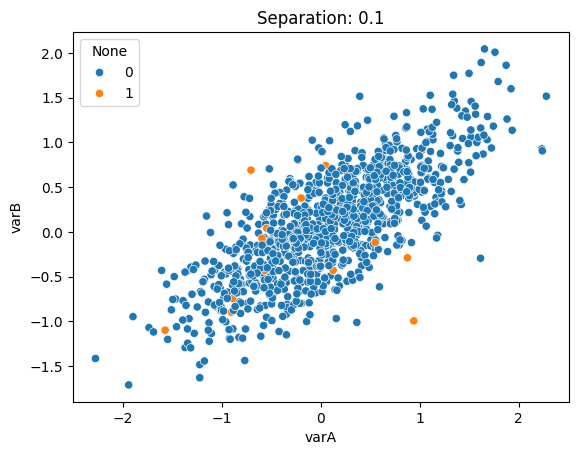

0    983
1     17
Name: count, dtype: int64


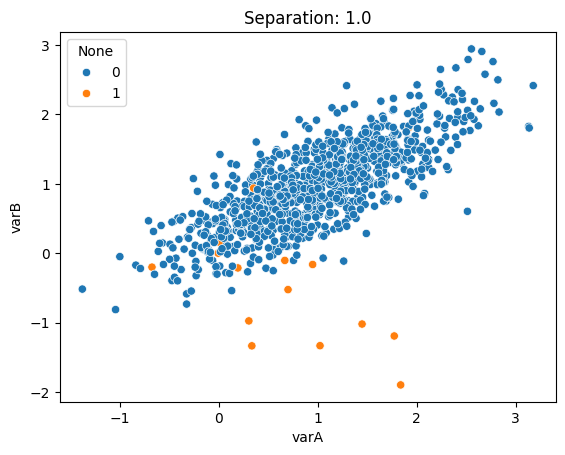

0    983
1     17
Name: count, dtype: int64


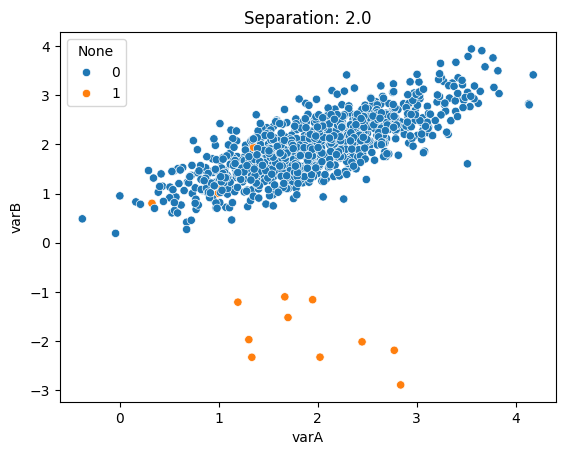

In [3]:
# make datasets with different class separateness
# and plot
for sep in [0.1, 1., 2.]:
    X, y = make_data(sep)
    print(y.value_counts())

    sns.scatterplot(data=X, x='varA', y='varB', hue=y)
    plt.title('Separation: {}'.format(sep))
    plt.show()

As we increase the parameter `sep`, the minority and majority class show less degree of overlap.

## Undersample with TomekLinks

### Well separated classes

In [31]:
# create data
X, y = make_data(sep=2)

# set up TomekLinks
tl = TomekLinks(
    sampling_strategy='auto',   # undersamples only the majority class
    n_jobs=-1
)

X_resampled, y_resampled = tl.fit_resample(X, y)

In [32]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [33]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((994, 2), (994,))

In [34]:
# number of minority class obs
y.value_counts()

0    983
1     17
Name: count, dtype: int64

In [35]:
y_resampled.value_counts()

0    977
1     17
Name: count, dtype: int64

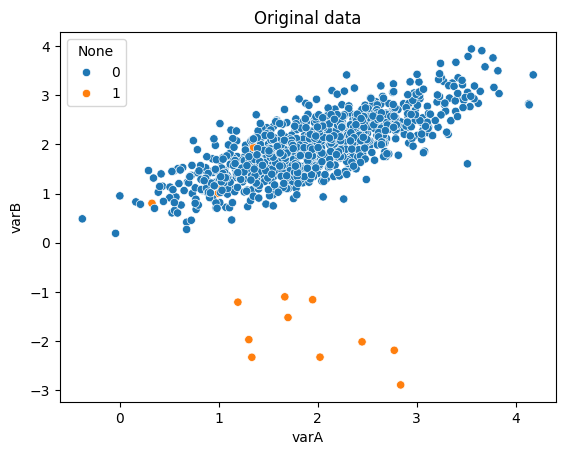

In [36]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y)

plt.title('Original data')
plt.show()

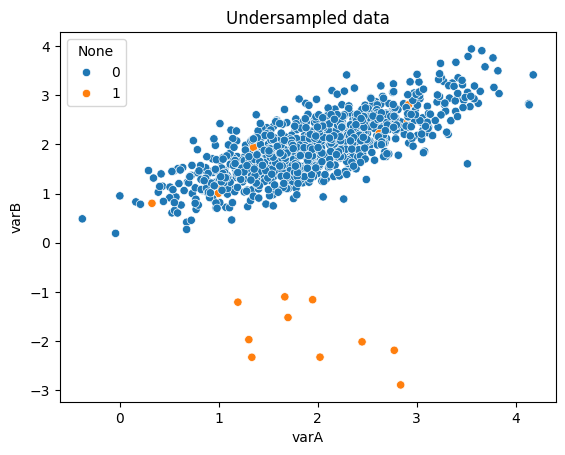

In [37]:
# plot undersampled data
sns.scatterplot(data=X_resampled, x='varA', y='varB', hue=y_resampled)

plt.title('Undersampled data')
plt.show()

### Partially separated classes

In [38]:
# create data
X, y = make_data(sep=0.5)

# set up TomekLinks
tl = TomekLinks(
    sampling_strategy='all',   # remove entire link
    n_jobs=-1
)

X_resampled, y_resampled = tl.fit_resample(X, y)

In [39]:
# size of original data
X.shape, y.shape

((1000, 2), (1000,))

In [40]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((976, 2), (976,))

In [41]:
# number of minority class obs
y.value_counts()

0    983
1     17
Name: count, dtype: int64

In [42]:
y_resampled.value_counts()

0    971
1      5
Name: count, dtype: int64

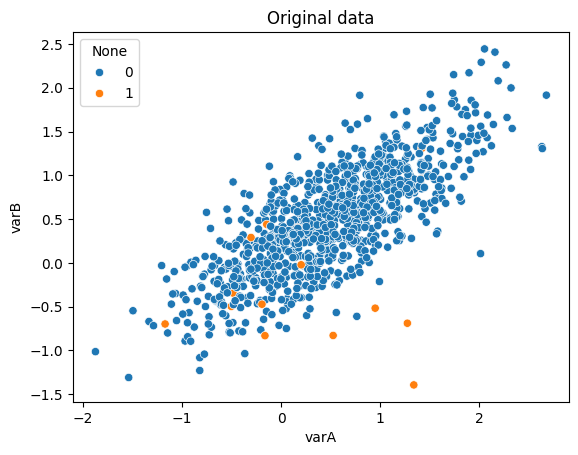

In [43]:
sns.scatterplot(data=X, x='varA', y='varB', hue=y)

plt.title('Original data')
plt.show()

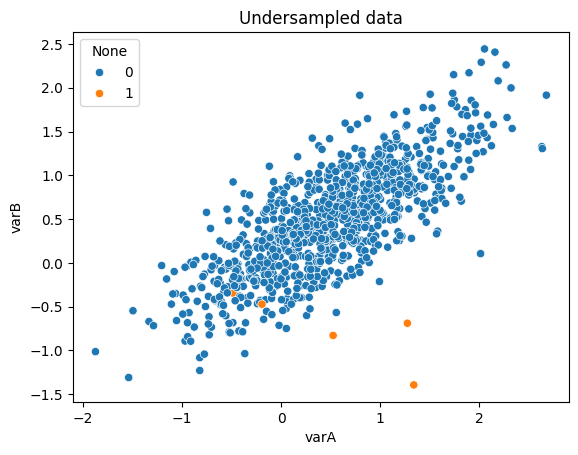

In [44]:
# plot undersampled data
sns.scatterplot(data=X_resampled, x='varA', y='varB', hue=y_resampled)

plt.title('Undersampled data')
plt.show()

## Tomek Links
### Real data - Performance comparison
Does it work well with real datasets?

In [45]:
# Load data
data = pd.read_csv('../datasets/kdd2004.csv')

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
0,52.0,32.69,0.30,2.5,20.0,1256.8,-0.89,0.33,11.0,-55.0,...,1595.1,-1.64,2.83,-2.0,-50.0,445.2,-0.35,0.26,0.76,-1
1,58.0,33.33,0.00,16.5,9.5,608.1,0.50,0.07,20.5,-52.5,...,762.9,0.29,0.82,-3.0,-35.0,140.3,1.16,0.39,0.73,-1
2,77.0,27.27,-0.91,6.0,58.5,1623.6,-1.40,0.02,-6.5,-48.0,...,1491.8,0.32,-1.29,0.0,-34.0,658.2,-0.76,0.26,0.24,-1
3,41.0,27.91,-0.35,3.0,46.0,1921.6,-1.36,-0.47,-32.0,-51.5,...,2047.7,-0.98,1.53,0.0,-49.0,554.2,-0.83,0.39,0.73,-1
4,50.0,28.00,-1.32,-9.0,12.0,464.8,0.88,0.19,8.0,-51.5,...,479.5,0.68,-0.59,2.0,-36.0,-6.9,2.02,0.14,-0.23,-1


In [46]:
# imbalanced target
data['target'].value_counts(normalize=True)

target
-1    0.991108
 1    0.008892
Name: proportion, dtype: float64

In [47]:
# separate dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target'], axis=1),  # drop the target
    data['target'],  # just the target
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((102025, 74), (43726, 74))

In [59]:
# set up Tomek Links

tl = TomekLinks(
    sampling_strategy='all',  # remove entire link
    n_jobs=-1)

X_resampled, y_resampled = tl.fit_resample(X_train, y_train)

In [60]:
# size of undersampled data
X_resampled.shape, y_resampled.shape

((101851, 74), (101851,))

The undersampled dataset is very similar to the original dataset, only 87 observations were removed. So there is no real point in testing the performance. The difference in the performance will most likely be driven by the randomness of the Random Forests than by the difference in the dataset.

## Plot data

Text(0.5, 1.0, 'Original data')

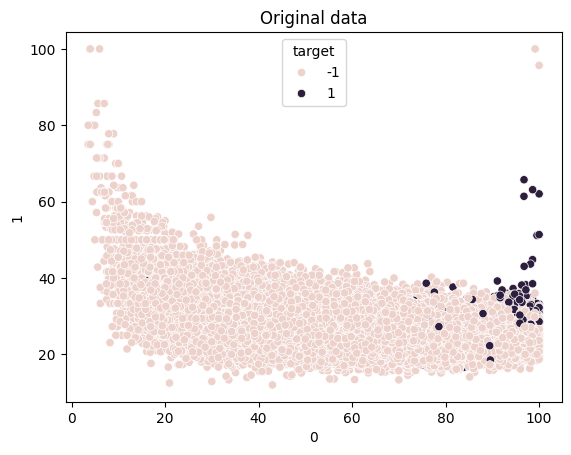

In [61]:
# original data

sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

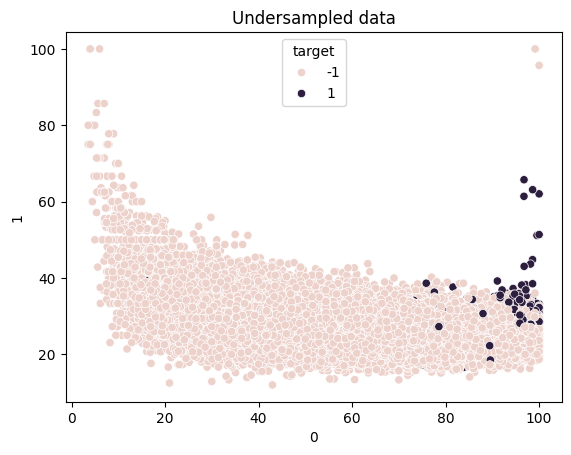

In [62]:
# undersampled data

sns.scatterplot(data=X_resampled,
                x="0",
                y="1",
                hue=y_resampled)

plt.title('Undersampled data')

Text(0.5, 1.0, 'Original data')

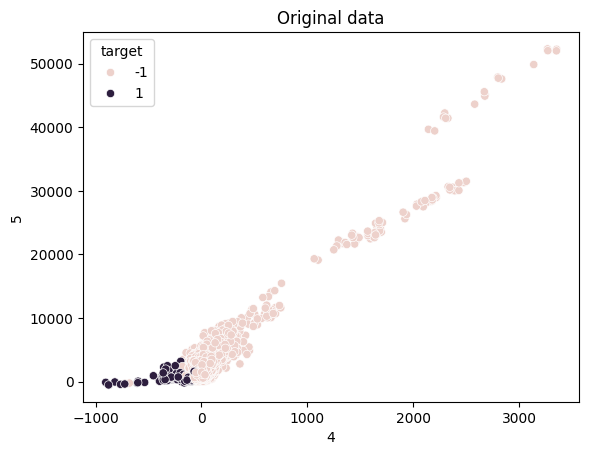

In [63]:
# original data

sns.scatterplot(data=X_train,
                x="4",
                y="5",
                hue=y_train)

plt.title('Original data')

Text(0.5, 1.0, 'Undersampled data')

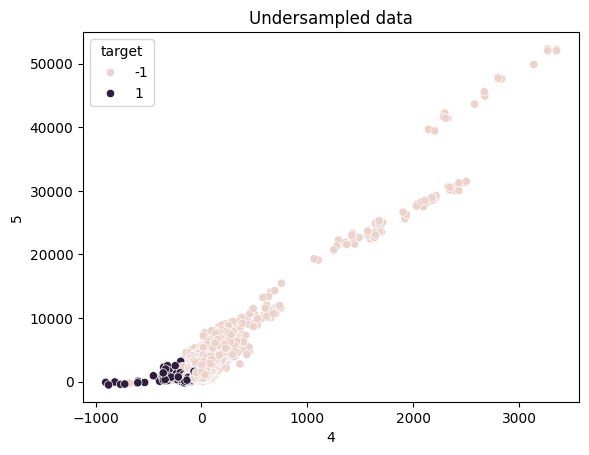

In [64]:
sns.scatterplot(data=X_resampled,
                x="4",
                y="5",
                hue=y_resampled)

plt.title('Undersampled data')

## Machine learning performance comparison

In [65]:
# function to train random forests and evaluate the performance
def run_randomForests(X_train, X_test, y_train, y_test):
    
    rf = RandomForestClassifier(n_estimators=200, random_state=39, max_depth=4)
    rf.fit(X_train, y_train)

    print('Train set')
    pred = rf.predict_proba(X_train)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_train, pred[:,1])))
    
    print('Test set')
    pred = rf.predict_proba(X_test)
    print('Random Forests roc-auc: {}'.format(roc_auc_score(y_test, pred[:,1])))

In [66]:
# evaluate performance of algorithm built
# using imbalanced dataset
run_randomForests(X_train, X_test, y_train, y_test)

Train set
Random Forests roc-auc: 0.9736769545142595
Test set
Random Forests roc-auc: 0.9724711107235364


In [67]:
# evaluate performance of algorithm built
# using undersampled dataset
run_randomForests(X_resampled, X_test, y_resampled, y_test)

Train set
Random Forests roc-auc: 0.9786528824304064
Test set
Random Forests roc-auc: 0.9657229222790189


Removing Tomek Links did not seem to improve performance